<a href="https://colab.research.google.com/github/unica-ml/ml/blob/master/notebooks/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Lab02

## **Exercise 1**

Implement the function ```make_gaussian_dataset(n, mu, sigma)``` that generates a k-class Gaussian dataset in a d-dimensional space, being

- ```n``` a vector of k elements containing each the number of samples for each class;
- ```mu``` a matrix with ```shape=(k,d)``` in which each row contains the mean vector $\mu_k = (\mu_{k1}, \ldots, \mu_{kd}) $ for each class;
- ```sigma``` a matrix with ```shape=(k,d)``` in which each row contains the standard deviation $\sigma_k = (\sigma_{k1}, \ldots, \sigma_{kd})$ (for each dimension) for each class.

In practice, samples for class $k$ will be sampled from:
$x_k \sim \mathcal N(\mu_k, \Sigma_k)$, where $\Sigma_k$ is a diagonal covariance matrix:

$\Sigma_k = \begin{bmatrix} 
\sigma^2_{k1} & 0 & \ldots & 0 \\
0 & \sigma^2_{k2} & \ldots & 0 \\
0 & 0 & \ldots & 0 \\
0 & 0 & \ldots & \sigma^2_{kd} 
\end{bmatrix}$ .

The function returns the corresponding feature matrix ```x``` and labels ```y```.

**Hints:**
- Use ```np.random.randn(...)``` to generate random numbers from a standard Gaussian distribution, with zero mean and unit variance, and then transform them to have a different mean and variance (repeat once per class). 
- Recall that, if $z \sim \mathcal N(0,1)$, then $x = \sigma z + \mu \sim \mathcal N(\mu, \sigma^2)$. Please delve deeper into transformations of (Gaussian) random variables if you are not familiar with this notation.
- Use ```np.ones(...)``` and/or ```np.zeros(...)``` for class labels.


In [2]:
import numpy as np


def make_gaussian_datasets(n, mu, sigma):
    '''Generating a d-dimensional Gaussian dataset with k classes.'''
    n = np.array(n)  # cast to ndarray
    mu = np.array(mu)
    sigma = np.array(sigma)

    n_classes = mu.shape[0]  # n.size or n.shape[0]
    n_features = mu.shape[1]
    n_samples = np.sum(n)

    X = np.zeros(shape=(n_samples, n_features)) 
    Y = np.zeros(shape=(n_samples,))

    start_idx = 0
    for k in range(n_classes):  # loop over classes
        z = np.random.randn(n[k], n_features)  # sampling from N(0,1)
        xk =  z*sigma[k, :] + mu[k, :]  # transform z to sample from N(mu,sigma)
        yk = k * np.ones(shape=(n[k],))  # generate nk labels equal to k
        X[start_idx:start_idx+n[k], :] = xk
        Y[start_idx:start_idx+n[k]] = yk
        start_idx += n[k]
    return X, Y

n = [100, 100, 100]  # number of points in each class
mu = [ [-5, -5], [+5, +5], [+5, -5] ]
sigma = [[2, 2], [2, 2], [2, 2]]

X, Y = make_gaussian_datasets(n, mu, sigma)

# print(X)
# print(Y)

# re-estimate mean and standard deviation from the generated data
for k in range(np.unique(Y).size):
    print('mean of class ' + str(k) +': ', X[Y==k,:].mean(axis=0))
    print('std of class ' + str(k) +': ', X[Y==k,:].std(axis=0))

mean of class 0:  [-4.91495327 -5.15286877]
std of class 0:  [1.97909043 2.05785344]
mean of class 1:  [5.09724812 4.89082382]
std of class 1:  [1.96985341 1.99979895]
mean of class 2:  [ 4.66170326 -5.02592252]
std of class 2:  [1.94808133 2.11185562]


## **Exercise 2**

Implement the function ```plot_dataset(X,Y)``` to scatter the data generated in the previous exercise on a bi-dimensional feature space.

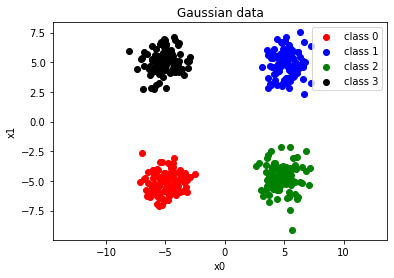

In [17]:
import matplotlib.pyplot as plt


def plot_dataset(X,Y):
    colors = ['r', 'b', 'g', 'k', 'c', 'm', 'y']
    
    n_classes = np.unique(Y).size

    for k in range(n_classes):
        xk = X[Y==k, :] 
        plt.scatter(xk[:, 0], xk[:, 1], c=colors[k], label='class ' + str(k))

    plt.legend()
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.title('Gaussian data')


n = [100, 100, 100, 100]  # number of points in each class
mu = [ [-5, -5], [+5, +5], [+5, -5], [-5, +5] ]
sigma = [[1, 1], [1, 1], [1, 1], [1, 1]]
X, Y = make_gaussian_datasets(n, mu, sigma)
plot_dataset(X,Y)
plt.axis('equal')
plt.show()

## **Exercise 3**

Implement a nearest-mean classifier, which assigns data samples `x` to the class with the closest centroid.

- Implement the method `fit(x,y)` that estimates the centroids (one per class) from the training data.
- Implement the method `predict(x)` that computes the predicted labels for each sample in `x`.

See also https://en.wikipedia.org/wiki/Nearest_centroid_classifier 

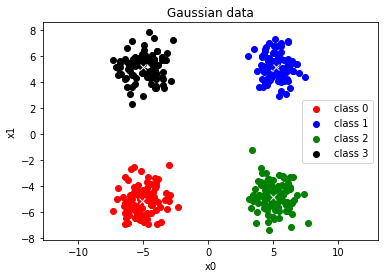

Accuracy on training data:  1.0


In [18]:
from sklearn.metrics import pairwise_distances


def fit(X, Y):
    """Estimate the training data centroids."""
    n_classes = np.unique(Y).size
    n_features = X.shape[1]
    centroids = np.zeros(shape=(n_classes, n_features))
    for k in range(n_classes):
        centroids[k, :] = np.mean(X[Y==k, :], axis=0)
    return centroids


def predict(X, centroids):
    """Predict labels for samples in X. 
    Each sample is assigned to the class of the closest centroid."""
    # compute distance matrix of X vs centroids
    d = pairwise_distances(X, centroids)
    y_pred = np.argmin(d ,axis=1)  # take index of minimum per row
    return y_pred

    
n = [100, 100, 100, 100]  # number of points in each class
mu = [ [-5, -5], [+5, +5], [+5, -5], [-5, +5] ]
sigma = [[1, 1], [1, 1], [1, 1], [1, 1]]
X, Y = make_gaussian_datasets(n, mu, sigma)

# fit the classifier (i.e., estimate the training data centroids)
centroids = fit(X, Y)

# plot dataset and centroids
plot_dataset(X,Y)
plt.plot(centroids[:, 0], centroids[:, 1], 'wx')
plt.axis('equal')
plt.show()

# compute predictions on X using the estimated centroids
y_pred = predict(X, centroids)

# accuracy: the fraction of samples that are correctly predicted
acc = (Y == y_pred).mean()  
print('Accuracy on training data: ', acc)

Now, let's create a consistent object that contains both functions with a Python class.

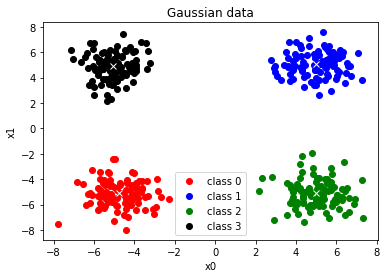

Accuracy on training data:  1.0


In [20]:
class CNearestMeanClassifier:
    """Class implementing a nearest mean classifier"""

    def __init__(self):
        self._centroids = None
        return

    @property
    def centroids(self):
        return self._centroids

    def fit(self, X, Y):
        n_classes = np.unique(Y).size
        n_features = X.shape[1]
        self._centroids = np.zeros(shape=(n_classes, n_features))
        for k in range(n_classes):
            self._centroids[k, :] = np.mean(X[Y==k, :], axis=0)
        return self    

    def predict(self, X):
        d = pairwise_distances(X, self._centroids)
        y_pred = np.argmin(d ,axis=1)
        return y_pred


n = [100, 100, 100, 100]  # number of points in each class
mu = [ [-5, -5], [+5, +5], [+5, -5], [-5, +5] ]
sigma = [[1, 1], [1, 1], [1, 1], [1, 1]]
X, Y = make_gaussian_datasets(n, mu, sigma)
plot_dataset(X,Y)

clf = CNearestMeanClassifier()
clf.fit(X, Y)

plt.plot(clf.centroids[:, 0], clf.centroids[:, 1], 'wx')
plt.show()

y_pred = clf.predict(X)

acc = (Y == y_pred).mean()
print('Accuracy on training data: ', acc)


## Exercise 4

Visualize the decision regions of the NearestMeanClassifier, as well as of other sklearn classifiers.

See, e.g., https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 

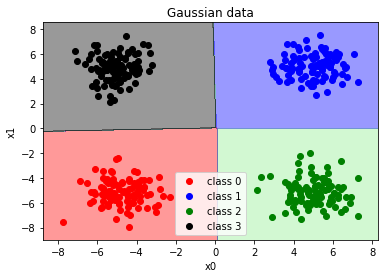

In [21]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(x, y, classifier, resolution=0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'black', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plot_dataset(x,y)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    return

plot_decision_regions(X, Y, clf)
plt.show()


Let's do it for some sklearn classifiers too.

Classification accuracy:  0.98


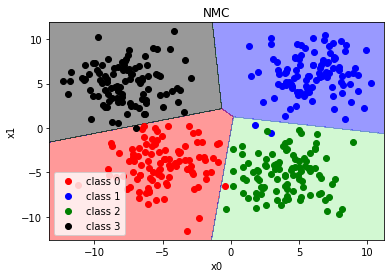

Classification accuracy:  0.9775


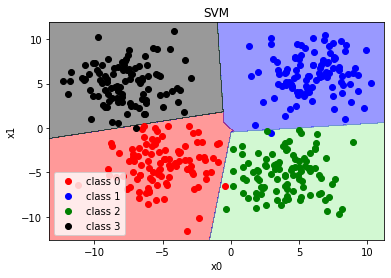

Classification accuracy:  0.9825


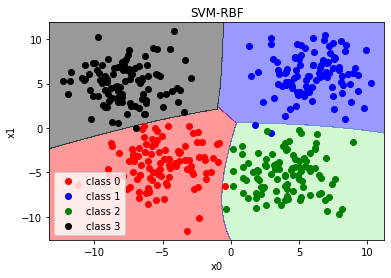

Classification accuracy:  0.9725


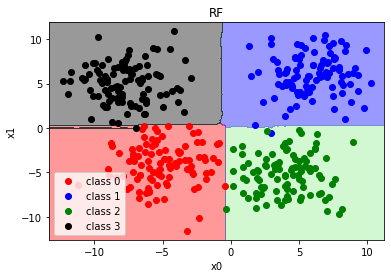

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


n = [100, 100, 100, 100]  # number of points in each class
mu = [ [-5, -4], [+6, +6], [+4, -5], [-8, +5] ]
sigma = 2.2*np.array([[1, 1], [1, 1], [1, 1], [1, 1]])
x_tr, y_tr = make_gaussian_datasets(n, mu, sigma)
x_ts, y_ts = make_gaussian_datasets(n, mu, sigma)

clf_list = [CNearestMeanClassifier(), 
            SVC(kernel='linear'),
            SVC(kernel='rbf'), 
            RandomForestClassifier()]

clf_names = ['NMC', 'SVM', 'SVM-RBF', 'RF']

for i, clf in enumerate(clf_list):
    clf.fit(x_tr, y_tr)
    plot_decision_regions(x_tr, y_tr, clf)
    y_pred = clf.predict(x_ts)
    print('Classification accuracy: ', np.mean(y_pred == y_ts))
    plt.title(clf_names[i])
    plt.show()
